# Classification 

Let's try to predict the type of pokemon based on the abilites his have

##### Import Section

In [1]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer

##### Load CSV and Prepare Data

In [2]:
df = pd.read_csv("full_pokemon.csv")
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [3]:
def create_text(row):
    lista = row['abilities']
    text = lista.replace('[', '')
    text = text.replace(']', '')
    text = text.replace('\', \'', ' ')
    text = text.replace('\'', '')
    return text
    
    

df['text'] = df.apply(create_text,axis=1)
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,text
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,1,65,65,45,grass,poison,6.9,1,0,Overgrow Chlorophyll
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,2,80,80,60,grass,poison,13.0,1,0,Overgrow Chlorophyll
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,3,122,120,80,grass,poison,100.0,1,0,Overgrow Chlorophyll
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,4,60,50,65,fire,NaN,8.5,1,0,Blaze Solar Power
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,5,80,65,80,fire,NaN,19.0,1,0,Blaze Solar Power


## Data Exploration

In [4]:
from io import StringIO

col = ['type1', 'text']

df = df[col]

df = df[pd.notnull(df['text'])]

df.columns = ['type1', 'text']

df['category_id'] = df['type1'].factorize()[0]

category_id_df = df[['type1', 'category_id']].drop_duplicates().sort_values('category_id')

category_to_id = dict(category_id_df.values)

df.head()

,type1,text,category_id
0,grass,Overgrow Chlorophyll,0
1,grass,Overgrow Chlorophyll,0
2,grass,Overgrow Chlorophyll,0
3,fire,Blaze Solar Power,1
4,fire,Blaze Solar Power,1


In [5]:
df['type1'].factorize()

(array([ 0,  0,  0,  1,  1,  1,  2,  2,  2,  3,  3,  3,  3,  3,  3,  4,  4,
         4,  4,  4,  4,  4,  5,  5,  6,  6,  7,  7,  5,  5,  5,  5,  5,  5,
         8,  8,  1,  1,  4,  4,  5,  5,  0,  0,  0,  3,  3,  3,  3,  7,  7,
         4,  4,  2,  2,  9,  9,  1,  1,  2,  2,  2, 10, 10, 10,  9,  9,  9,
         0,  0,  0,  2,  2, 11, 11, 11,  1,  1,  2,  2,  6,  6,  4,  4,  4,
         2,  2,  5,  5,  2,  2, 12, 12, 12, 11, 10, 10,  2,  2,  6,  6,  0,
         0,  7,  7,  9,  9,  4,  5,  5,  7,  7,  4,  0,  4,  2,  2,  2,  2,
         2,  2, 10,  3, 13,  6,  1,  3,  4,  2,  2,  2,  4,  4,  2,  6,  1,
         4, 11, 11, 11, 11, 11,  4, 13,  6,  1, 14, 14, 14, 10, 10,  0,  0,
         0,  1,  1,  1,  2,  2,  2,  4,  4,  4,  4,  3,  3,  3,  3,  5,  2,
         2,  6,  8,  4,  8,  8, 10, 10,  6,  6,  6,  0,  2,  2, 11,  2,  0,
         0,  0,  4,  0,  0,  3,  2,  2, 10, 15, 15,  2, 12, 10, 10,  4,  3,
         3,  4,  7, 16,  8,  8,  2,  3,  3,  3, 15,  4,  4,  1,  1, 13, 13,
         2, 

## Imbalanced Data

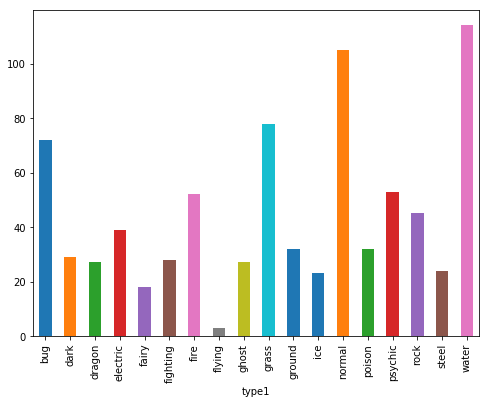

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,6))
df.groupby('type1').text.count().plot.bar(ylim=0)
plt.show()

## Text Representation

    - min_df is the minimum numbers of documents a word must be present in to be kept.
    - norm is set to l2, to ensure all our feature vectors have a euclidian norm of 1.
    - ngram_range is set to (1, 2) to indicate that we want to consider both unigrams and bigrams.

In [7]:

tfidf = TfidfVectorizer(min_df=2, ngram_range=(1, 2))

features = tfidf.fit_transform(df['text']).toarray()

labels = df['type1']

features.shape

(801, 716)

In [9]:
labels

0         grass
1         grass
2         grass
3          fire
4          fire
5          fire
6         water
7         water
8         water
9           bug
10          bug
11          bug
12          bug
13          bug
14          bug
15       normal
16       normal
17       normal
18       normal
19       normal
20       normal
21       normal
22       poison
23       poison
24     electric
25     electric
26       ground
27       ground
28       poison
29       poison
         ...   
771      normal
772      normal
773        rock
774      normal
775        fire
776    electric
777       ghost
778       water
779      normal
780       ghost
781      dragon
782      dragon
783      dragon
784    electric
785     psychic
786       grass
787       water
788     psychic
789     psychic
790     psychic
791     psychic
792        rock
793         bug
794         bug
795    electric
796       steel
797       grass
798        dark
799     psychic
800       steel
Name: type1, Length: 801

In [13]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2

for Type, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == Type)
    
    indices = np.argsort(features_chi2[0])
  
    feature_names = np.array(tfidf.get_feature_names())[indices]
  
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
      
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  
    print("# '{}':".format(Type))
  
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
      
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'bug':
  . Most correlated unigrams:
. compoundeyes
. swarm
  . Most correlated bigrams:
. shed skin
. shield dust
# 'dark':
  . Most correlated unigrams:
. pickpocket
. illusion
  . Most correlated bigrams:
. insomnia super
. unburden prankster
# 'dragon':
  . Most correlated unigrams:
. turboblaze
. teravolt
  . Most correlated bigrams:
. bulletproof soundproof
. soundproof overcoat
# 'electric':
  . Most correlated unigrams:
. lightningrod
. static
  . Most correlated bigrams:
. static plus
. static lightningrod
# 'fairy':
  . Most correlated unigrams:
. symbiosis
. flower
  . Most correlated bigrams:
. veil symbiosis
. flower veil
# 'fighting':
  . Most correlated unigrams:
. fist
. steadfast
  . Most correlated bigrams:
. guard steadfast
. guts sheer
# 'fire':
  . Most correlated unigrams:
. flash
. blaze
  . Most correlated bigrams:
. flame body
. flash fire
# 'flying':
  . Most correlated unigrams:
. frisk
. infiltrator
  . Most correlated bigrams:
. frisk infiltrator
. infilt

## Creating Model

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['type1'], random_state = 0, stratify=df['type1'])

count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

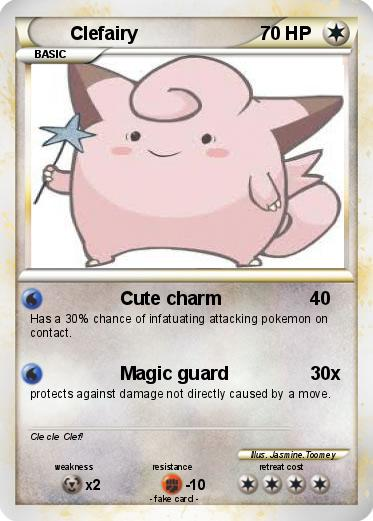

In [21]:
print(clf.predict(count_vect.transform(["cute charm magic guard"])))

['fairy']


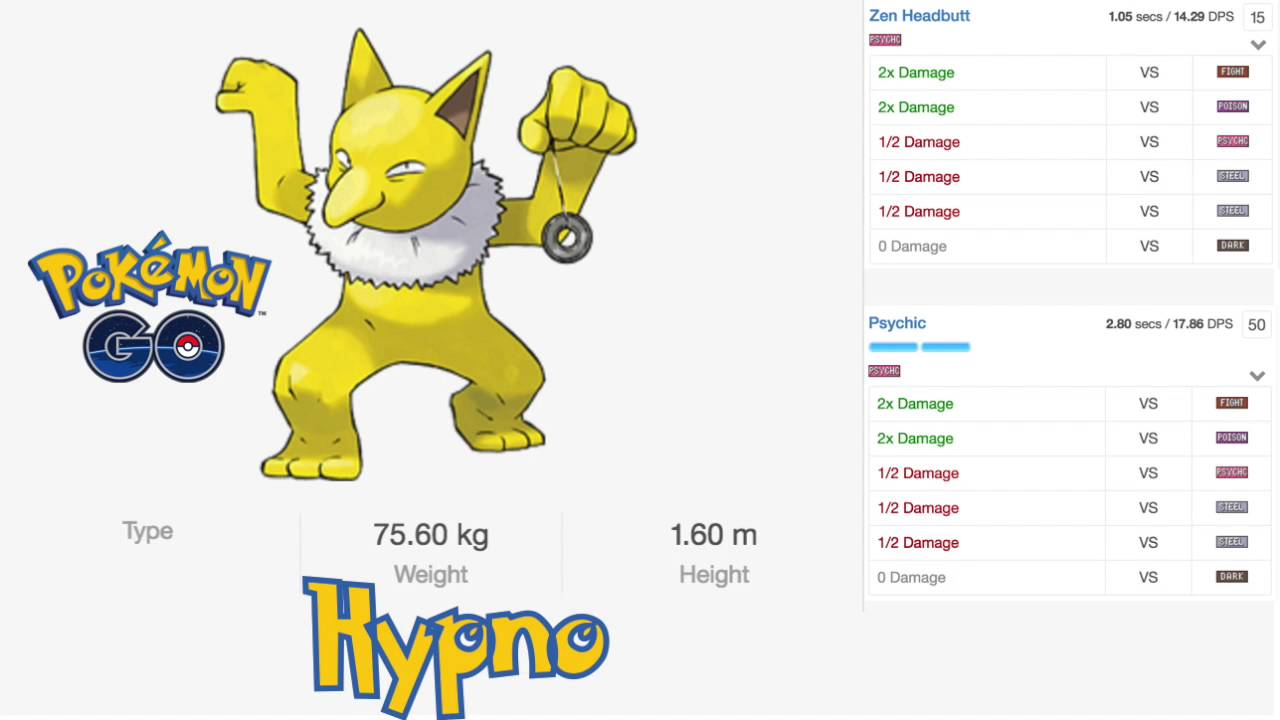

In [22]:
print(clf.predict(count_vect.transform(["psychic zen headbutt"])))

['psychic']


### Balanace Data

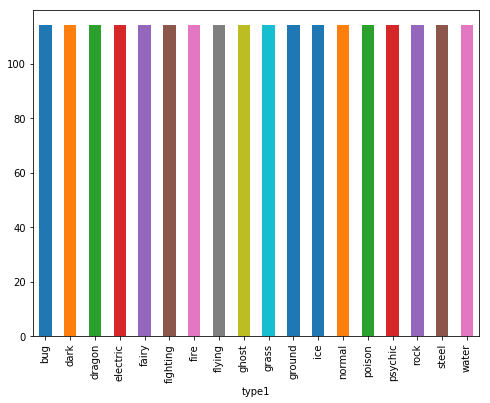

In [17]:
max_size = df['type1'].value_counts().max()

lst = [df]
for class_index, group in df.groupby('type1'):
    lst.append(group.sample(max_size-len(group), replace=True))
df_balanced = pd.concat(lst)

features = tfidf.fit_transform(df_balanced['text']).toarray()

labels = df_balanced['type1']

fig = plt.figure(figsize=(8,6))
df_balanced.groupby('type1').text.count().plot.bar(ylim=0)
plt.show()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df_balanced['text'], df_balanced['type1'], random_state = 0, stratify=df_balanced['type1'])

count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

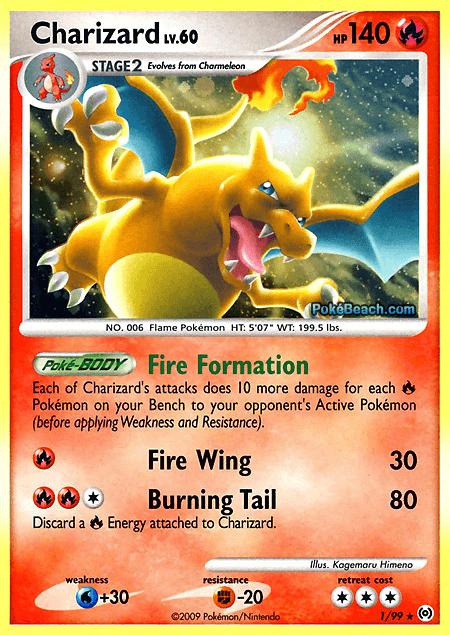

In [19]:
print(clf.predict(count_vect.transform(["fire wing burning tail"])))

['fire']


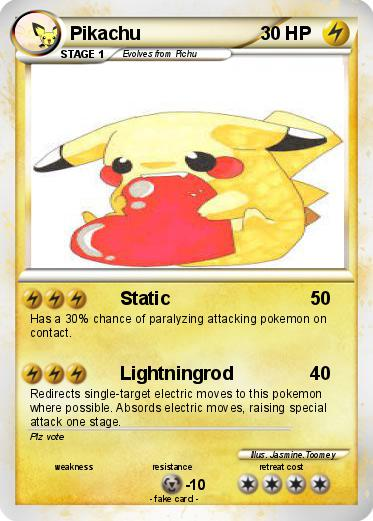

In [20]:
print(clf.predict(count_vect.transform(["static lightningrod"])))

['electric']


## Train with different Algorithms

C:\Users\nb20797\AppData\Local\Continuum\anaconda3\envs\ds_begginner\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nb20797\AppData\Local\Continuum\anaconda3\envs\ds_begginner\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\nb20797\AppData\Local\Continuum\anaconda3\envs\ds_begginner\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nb20797\AppData\Local\Continuum\anaconda3\envs\ds_begginner\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_cl

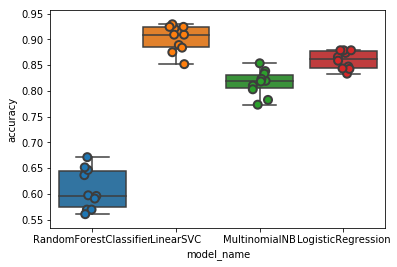

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]


CV = 10
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

for model in models:
    model_name = model.__class__.__name__
  
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))

        
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [18]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.901684
LogisticRegression        0.860101
MultinomialNB             0.815488
RandomForestClassifier    0.608923
Name: accuracy, dtype: float64

## Model Evaluation

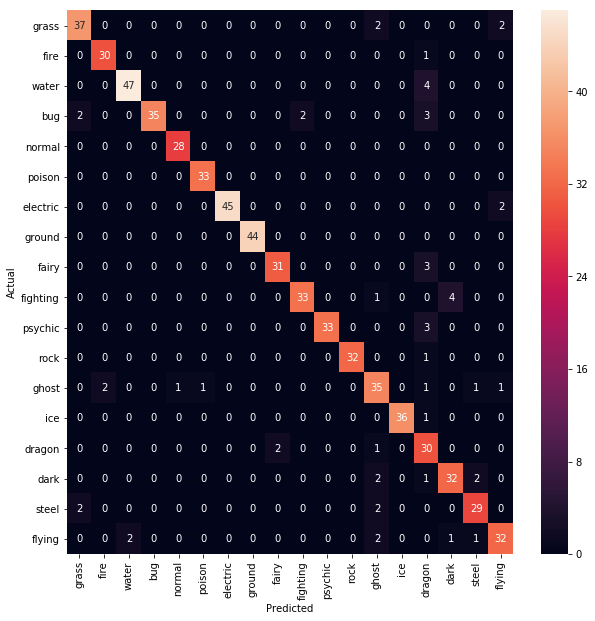

In [20]:
model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df_balanced.index, test_size=0.33, random_state=0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.type1.values, yticklabels=category_id_df.type1.values)

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

In [21]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['type1'].unique()))

              precision    recall  f1-score   support

       grass       0.90      0.90      0.90        41
        fire       0.94      0.97      0.95        31
       water       0.96      0.92      0.94        51
         bug       1.00      0.83      0.91        42
      normal       0.97      1.00      0.98        28
      poison       0.97      1.00      0.99        33
    electric       1.00      0.96      0.98        47
      ground       1.00      1.00      1.00        44
       fairy       0.94      0.91      0.93        34
    fighting       0.94      0.87      0.90        38
     psychic       1.00      0.92      0.96        36
        rock       1.00      0.97      0.98        33
       ghost       0.78      0.83      0.80        42
         ice       1.00      0.97      0.99        37
      dragon       0.62      0.91      0.74        33
        dark       0.86      0.86      0.86        37
       steel       0.88      0.88      0.88        33
      flying       0.86    